In [21]:
import pandas as pd
import numpy as np

In [22]:
url1="https://raw.githubusercontent.com/ChitranjanUpadhayay/ML_Projects/main/Datasets/Fake%20News/True.csv"
true=pd.read_csv(url1)

In [23]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [24]:
url2="https://raw.githubusercontent.com/ChitranjanUpadhayay/ML_Projects/main/Datasets/Fake%20News/Fake.csv"
fake=pd.read_csv(url2)

In [25]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [26]:
true['label']=1
fake['label']=0

In [34]:
df=pd.concat([fake,true]).reset_index(drop=True)

In [35]:
df=df.sample(frac=1)

In [36]:
df=df.drop(['title','subject','date'],axis=1)
df.head()

,text,label
6632,All the months of speculation that the modern ...,0
29162,WASHINGTON (Reuters) - The Trump administratio...,1
30165,SAN FRANCISCO (Reuters) - Climate scientists w...,1
4670,It s one thing to have a choice to sit to duri...,0
23761,WASHINGTON (Reuters) - The Trump administratio...,1


In [37]:
df.reset_index(inplace=True)

In [38]:
df.head()

,index,text,label
0,6632,All the months of speculation that the modern ...,0
1,29162,WASHINGTON (Reuters) - The Trump administratio...,1
2,30165,SAN FRANCISCO (Reuters) - Climate scientists w...,1
3,4670,It s one thing to have a choice to sit to duri...,0
4,23761,WASHINGTON (Reuters) - The Trump administratio...,1


In [39]:
df.drop(columns=['index'],inplace=True)
df.head()

,text,label
0,All the months of speculation that the modern ...,0
1,WASHINGTON (Reuters) - The Trump administratio...,1
2,SAN FRANCISCO (Reuters) - Climate scientists w...,1
3,It s one thing to have a choice to sit to duri...,0
4,WASHINGTON (Reuters) - The Trump administratio...,1


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

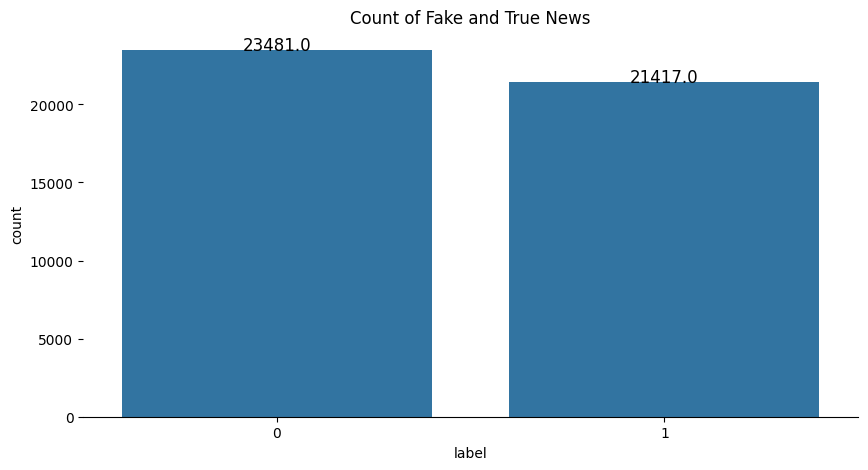

In [41]:
#creating a count plot for category column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="label", data=df)
plt.title("Count of Fake and True News")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [43]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [45]:
# Drop NA values
df = df.dropna()

# Missing data analysis again
df.isnull().sum()

text     0
label    0
dtype: int64

In [46]:
df.head()

,text,label
0,All the months of speculation that the modern ...,0
1,WASHINGTON (Reuters) - The Trump administratio...,1
2,SAN FRANCISCO (Reuters) - Climate scientists w...,1
3,It s one thing to have a choice to sit to duri...,0
4,WASHINGTON (Reuters) - The Trump administratio...,1


In [47]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [48]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lm=WordNetLemmatizer()

In [49]:
#creating list of stopwords containing stopwords from spacy and nltk

#stopwords of spacy
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
179
382


In [50]:
def clean_text(text):

    """
    It takes text as an input and clean it by applying several methods

    """

    string = ""

    #lower casing
    text=text.lower()

    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)

    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"https?://\S+|www\.\S+"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub(r"\n"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    for word in text.split():
        if word not in Stopwords:
            string+=lm.lemmatize(word)+" "

    return string

In [51]:
df["text"]=df["text"].apply(clean_text)

In [53]:
x=df['text']
y=df['label']

In [54]:
x

0        month speculation modern day kkk endorse donal...
1        washington reuters trump administration midst ...
2        san francisco reuters climate scientist worrie...
3        thing choice sit national anthem entirely forc...
4        washington reuters trump administration wednes...
                               ...                        
44893    nbc attempt discredit trump shined bright ligh...
44894    washington reuters president barack obama meet...
44895    washington reuters fbi report scolding democra...
44896    washington reuters acting secretary homeland s...
44897    washington reuters u republican presidential c...
Name: text, Length: 44898, dtype: object

In [55]:
y

0        0
1        1
2        1
3        0
4        1
        ..
44893    0
44894    1
44895    1
44896    1
44897    1
Name: label, Length: 44898, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [61]:
#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",RandomForestClassifier())])
text_clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [62]:
predictions=text_clf.predict(x_test)

In [63]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7704
           1       0.99      0.99      0.99      7113

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



In [64]:
print(metrics.accuracy_score(y_test,predictions))

0.9892015927650671


In [65]:
print(metrics.confusion_matrix(y_test,predictions))

[[7612   92]
 [  68 7045]]


In [66]:
def output_label(n):
  if n==0:
    return "It is a Fake News"
  elif n == 1:
    return "It is a Genuine News"

In [76]:
def manual_testing(news):
    # Create a DataFrame with the new news
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)

    # Clean the text
    new_def_test["text"] = new_def_test["text"].apply(clean_text)

    # Get the text from the DataFrame
    new_x_test = new_def_test["text"]

    # Transform the text using the pre-trained pipeline
    new_xv_test = text_clf["tfidf"].transform(new_x_test)

    # Predict using the pre-trained pipeline
    pred_rfc = text_clf["clf"].predict(new_xv_test)

    # Return the prediction
    return "\nRFC Prediction: {}".format(output_label(pred_rfc[0]))

In [93]:
news=str(input())
manual_testing(news)

Israel Iran War News Live Updates: Will exact price from Iran when time is right, says Israel; global powers urge restraint Israel Gaza War Live Updates: Top Iranian commanders warned Israel on Sunday that the country would face a bigger attack if it retaliates against overnight drone and missile strikes, adding that Washi...READ MORE  Key Events Key Events NEWS UPDATES 19:36 (IST) Apr 14 Iran informed Turkey in advance of its operation against Israel: Turkish source  According to Turkish sources, Iran informed turkey in Advance about the Saturday Operation.  19:33 (IST) Apr 14 Iran's attack on Israel stirs admiration among Gaza Palestinians  Iran's attack on Israel drew applause from many Palestinians in Gaza on Sunday as rare payback for the Israeli offensive on their enclave, although some said they suspected Tehran had staged the assault more for show than to inflict real damage."For the first time, we saw some rockets that didn’t land in our areas. These rockets were going into th

'\nRFC Prediction: It is a Genuine News'